## Changing directory

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/image_matting/fba

## Installing libraries

In [4]:
!pip3 install -r requirements.txt


## Importing modules 

In [5]:

from demo import np_to_torch, pred, scale_input
from dataloader import read_image, read_trimap
from networks.models import build_model
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Setting arguments

In [6]:
class Args:
  encoder = 'resnet50_GN_WS'
  decoder = 'fba_decoder'
  weights = 'FBA.pth'
args=Args()

model = build_model(args)

modifying input layer to accept 11 channels


## Importing image/trimap

In [26]:
image = read_image('/content/drive/MyDrive/Colab Notebooks/image_matting/DUTS-TR/DUTS-TR-Image/ILSVRC2012_test_00000018.jpg')
trimap = read_trimap('/content/drive/MyDrive/Colab Notebooks/image_matting/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_test_00000018.png')


## Plotting image/trimap

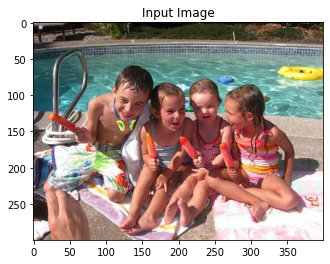

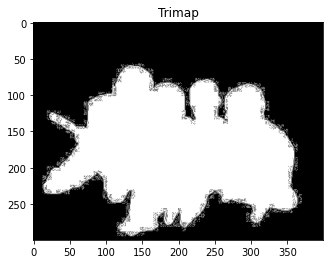

In [27]:
plt.title('Input Image')
plt.imshow(image)
plt.show()

# transform two channel trimap back to single channel
trimap_im =  trimap[:,:,1] + (1-np.sum(trimap,-1))/2
plt.title('Trimap')
plt.imshow(trimap_im, cmap='gray', vmin=0, vmax=1)
plt.show()

## Predicting Alpha matte

In [28]:
fg, bg, alpha = pred(image, trimap, model)

## Plotting dimensions

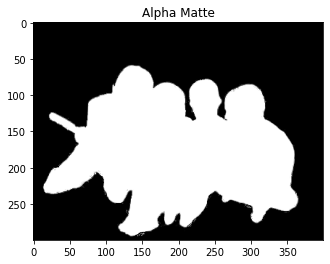

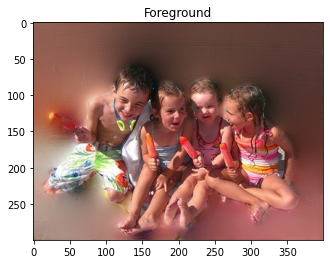

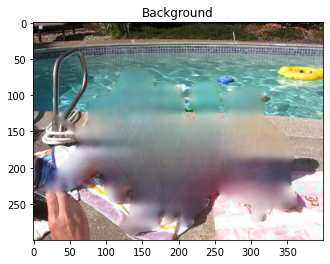

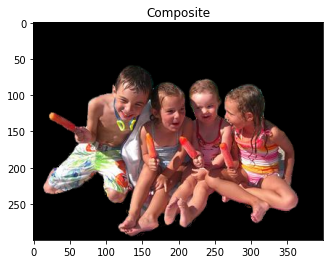

In [29]:
plt.title('Alpha Matte')
plt.imshow(alpha, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.title('Foreground')
plt.imshow(fg)
plt.show()
plt.title('Background')
plt.imshow(bg)
plt.show()
plt.title('Composite')
plt.imshow(fg*alpha[:,:,None])
plt.show()